Some shipping containers with valuables inside washed ashore. You get to choose a maximum of two containers to open and receive the valuable contents from. The first container you open is free of charge, but for the second one you will have to pay some SeaShells. Keep in mind that you are not the only one choosing containers and making a claim on its contents. You will have to split the spoils with all others that choose the same container. So, choose carefully. 

Here's a breakdown of how your profit from a container will be computed:
Every container has its **treasure multiplier** (up to 90) and number of **inhabitants** (up to 10) that will be choosing that particular container. The container’s total treasure is the product of the **base treasure** (10 000, same for all containers) and the container’s specific treasure multiplier. However, the resulting amount is then divided by the sum of the inhabitants that choose the same container and the percentage of opening this specific container of the total number of times a container has been opened (by all players). 

For example, if **5 inhabitants** choose a container, and **this container was chosen** **10% of the total number of times a container has been opened** (by all players), the prize you get from that container will be divided by 15. After the division, **costs for opening a container** apply (if there are any), and profit is what remains.

In [2]:
# multipler, inhabitants

containers = [
    (80, 6),
    (37, 3),
    (10, 1),
    (17, 1),
    (31, 2),
    (90, 10),
    (50, 4),
    (20, 2),
    (73, 4),
    (89, 8)
]

# 0 <= selected_proprotion <= 100 (percentage)
def container_result(multiplier, inhabitants, selected_proportion, costs=0, base_treasure=10000):
    return ((base_treasure * multiplier) / (inhabitants + selected_proportion)) - costs

for container in containers:
    selected_proportion = 100
    print(f"Container with multipler {container[0]} and {container[1]} inhabitants returns {container_result(container[0], container[1], selected_proportion)} seashells if {selected_proportion} pick it")

Container with multipler 80 and 6 inhabitants returns 7547.169811320755 seashells if 100 pick it
Container with multipler 37 and 3 inhabitants returns 3592.233009708738 seashells if 100 pick it
Container with multipler 10 and 1 inhabitants returns 990.0990099009902 seashells if 100 pick it
Container with multipler 17 and 1 inhabitants returns 1683.1683168316831 seashells if 100 pick it
Container with multipler 31 and 2 inhabitants returns 3039.2156862745096 seashells if 100 pick it
Container with multipler 90 and 10 inhabitants returns 8181.818181818182 seashells if 100 pick it
Container with multipler 50 and 4 inhabitants returns 4807.692307692308 seashells if 100 pick it
Container with multipler 20 and 2 inhabitants returns 1960.7843137254902 seashells if 100 pick it
Container with multipler 73 and 4 inhabitants returns 7019.2307692307695 seashells if 100 pick it
Container with multipler 89 and 8 inhabitants returns 8240.74074074074 seashells if 100 pick it


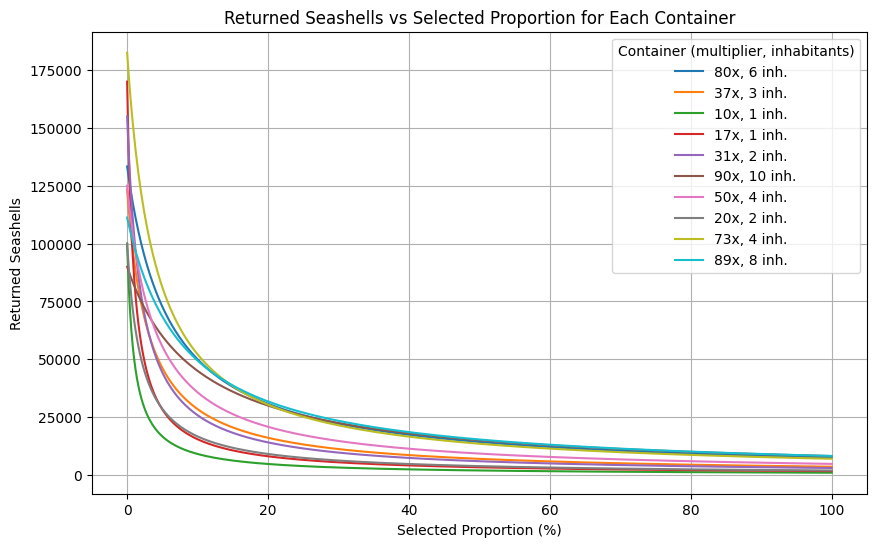

In [4]:
import numpy as np
import matplotlib.pyplot as plt

selected_proportions = np.linspace(0, 100, num=500)

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot each container on the same graph
for multiplier, inhabitants in containers:
    # Compute the returned seashells for each value in selected_proportions
    returns = [container_result(multiplier, inhabitants, sp) for sp in selected_proportions]
    label = f"{multiplier}x, {inhabitants} inh."
    plt.plot(selected_proportions, returns, label=label)

plt.xlabel("Selected Proportion (%)")
plt.ylabel("Returned Seashells")
plt.title("Returned Seashells vs Selected Proportion for Each Container")
plt.legend(title="Container (multiplier, inhabitants)")
plt.grid(True)
plt.show()

In [12]:
# Define the containers as (multiplier, fixed_inhabitants)
containers = [
    (80, 6),   # Container 1: 80x multiplier, 6 inhabitants
    (37, 3),   # Container 2: 37x multiplier, 3 inhabitants
    (10, 1),   # Container 3: 10x multiplier, 1 inhabitant
    (17, 1),   # Container 4: 17x multiplier, 1 inhabitant
    (31, 2),   # Container 5: 31x multiplier, 2 inhabitants
    (90, 10),  # Container 6: 90x multiplier, 10 inhabitants
    (50, 4),   # Container 7: 50x multiplier, 4 inhabitants
    (20, 2),   # Container 8: 20x multiplier, 2 inhabitants
    (73, 4),   # Container 9: 73x multiplier, 4 inhabitants
    (89, 8)    # Container 10: 89x multiplier, 8 inhabitants
]

def extra_picks_total(E, containers):
    """
    For a candidate equilibrium constant E,
    compute the sum over containers of extra picks required:
       x_i = max{ multiplier/E - fixed, 0 }
    """
    total = 0
    for multiplier, fixed in containers:
        total += max(multiplier / E - fixed, 0)
    return total

def find_equilibrium_E(containers, P, tol=1e-6, max_iter=10000000):
    """
    Finds the equilibrium constant E by solving:
       sum( max{ multiplier/E - fixed, 0 } ) = P
    using a bisection method.
    
    P: total number of extra strategic picks to distribute.
    Returns the equilibrium constant E.
    """
    # Lower bound: a very small number (E -> 0 yields huge extra picks)
    low = 1e-6
    # Upper bound: if E is very high, extra picks tend toward 0.
    # A conservative upper bound could be set to slightly above the highest initial ratio.
    high = max(m / f for m, f in containers) * 1.1
    
    for _ in range(max_iter):
        mid = (low + high) / 2
        total = extra_picks_total(mid, containers)
        if abs(total - P) < tol:
            return mid
        if total > P:
            # Too many extra picks: Increase E to lower the extra picks.
            low = mid
        else:
            # Too few extra picks: Decrease E.
            high = mid
    return (low + high) / 2  # Return best estimate if max_iter reached

# Set the total number of strategic extra picks to sum to 100.
P = 100

# Find the equilibrium constant E
E_eq = find_equilibrium_E(containers, P)
print("Equilibrium constant E =", E_eq)

# Compute the equilibrium extra picks for each container
equilibrium_distribution = []
nash_probabilities = []
for i, (multiplier, fixed) in enumerate(containers, start=1):
    nash_probabilities.append(extra / 100)
    extra = max(multiplier / E_eq - fixed, 0)
    equilibrium_distribution.append(extra)
    print(f"Container {i}: Multiplier = {multiplier}, Fixed inhabitants = {fixed}, Extra picks = {extra:.10f}")

# Display total picks per container (Fixed + Extra) and the resulting ratio
print("\nTotal picks per container (Fixed + Extra):")
for i, (multiplier, fixed) in enumerate(containers, start=1):
    total_picks = fixed + equilibrium_distribution[i-1]
    ratio = multiplier / total_picks if total_picks > 0 else 0
    print(f"Container {i}: Total picks = {total_picks:.10f}, Ratio multiplier/total = {ratio:.10f}")

# In equilibrium, for every container that receives extra picks, 
# multiplier / (fixed + extra) should equal approximately E_eq.

nash_probabilities = nash_probabilities / np.sum(nash_probabilities)

crates = np.array([
    [10, 1], [80, 6], [37, 3], [31, 2], [17, 1],
    [90,10], [50, 4], [20, 2], [73, 4], [89, 8]
])

index = np.random.choice(len(crates), p=nash_probabilities)
sampled_crate = crates[index]

np.sum(nash_probabilities)

print(f"Sampled Crate {index}: Multiplier = {sampled_crate[0]}, Inhabitants = {sampled_crate[1]}")


Equilibrium constant E = 3.5248226937943885
Container 1: Multiplier = 80, Fixed inhabitants = 6, Extra picks = 16.6961770704
Container 2: Multiplier = 37, Fixed inhabitants = 3, Extra picks = 7.4969818950
Container 3: Multiplier = 10, Fixed inhabitants = 1, Extra picks = 1.8370221338
Container 4: Multiplier = 17, Fixed inhabitants = 1, Extra picks = 3.8229376275
Container 5: Multiplier = 31, Fixed inhabitants = 2, Extra picks = 6.7947686148
Container 6: Multiplier = 90, Fixed inhabitants = 10, Extra picks = 15.5331992042
Container 7: Multiplier = 50, Fixed inhabitants = 4, Extra picks = 10.1851106690
Container 8: Multiplier = 20, Fixed inhabitants = 2, Extra picks = 3.6740442676
Container 9: Multiplier = 73, Fixed inhabitants = 4, Extra picks = 16.7102615767
Container 10: Multiplier = 89, Fixed inhabitants = 8, Extra picks = 17.2494969908

Total picks per container (Fixed + Extra):
Container 1: Total picks = 22.6961770704, Ratio multiplier/total = 3.5248226938
Container 2: Total picks 